그동안 공부한 크롤링을 이용해서 데이터를 추출하여 워드클라우드 만들기

---

- 워드클라우드의 각 단어는 빈도에 따라 크기가 결정. 많이 나오는 단어일수록 크기가 크게 나타남

# 1. 영어 문장을 이용한 워드클라우드

### 1) 영어 문장 나누기
`teext.py`에 준비된 문자열이 있습니다. 이 문자열을 공백 문자 기준으로 나누고, 각 단어별 횟수를 센 결과를 반환하는 `count_word_freq` 함수를 구현하세요.

`count_word_fre` 함수는 문자열을 입력받고, 문자열 내의 단어들이 몇 번 등장하는지 센 결과를 반환합니다. 

### 2) 워드클라우드 출력하기

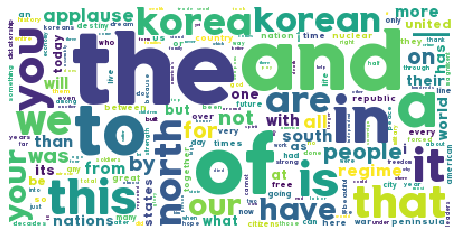

In [2]:
from collections import Counter
from string import punctuation
from module.text import data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def count_word_freq(data):
    _data = data.lower()
    for p in punctuation:
        _data = _data.replace(p, '')
        
    _data = _data.split()
    counter = Counter(_data)
    return counter


def create_wordcloud(data):
    counter = count_word_freq(data)
    
    wc = WordCloud(font_path="C:/Users/gjai_kmj/AppData/Local/Microsoft/windows/Fonts/TmonTium.ttf", background_color='white')
    
    plt.figure(figsize=(8, 12))
    plt.imshow(wc.generate_from_frequencies(counter))
    plt.axis('off')
    
    return None

if __name__ == '__main__':
    create_wordcloud(data)

# 2. 네이버 뉴스 기사 내용 워드클라우드

### 1) 네이버 뉴스 기사 내용 크롤링

네이버 뉴스의 특정 기사 내용을 추출하고, 하나의 문자열로 저장하세요. 기사를 크롤링하는 코드를 `crawling` 함수에 작성하세요.

### 2) 워드클라우드 출력하기

- tokenize 방법
1. split
2. tokenizer 이용 
    - 형태소
    - 단어

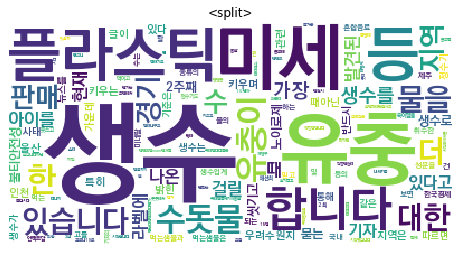

In [3]:
import requests
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud


def crawling(soup):
    div = soup.find('div', class_="_article_body_contents")
    text = div.get_text().replace("""
// flash 오류를 우회하기 위한 함수 추가
function _flash_removeCallback() {}""", "").replace("▶", "").replace("\n", "")
    
    # punctuation 모두 제거
    text = re.sub(r'[^\w\s]', "", text)
    
    return text

#---------------------------------------1번 문제에서 그대로 가져옴
# split
def count_word_freq(data):
    _data = data.lower()
    for p in punctuation:
        _data = _data.replace(p, '')
        
    _data = _data.split()
    counter = Counter(_data)
    return counter


def create_wordcloud(data):
    counter = count_word_freq(data)
    
    wc = WordCloud(font_path="c:/windows/fonts/KoPubWorld Dotum Bold.ttf", background_color='white')
    
    plt.figure(figsize=(8, 12))
    plt.imshow(wc.generate_from_frequencies(counter))
    plt.axis('off')
    
    return None
#-----------------------------------------------------------------
url = "https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=015&aid=0004386628"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
data = crawling(soup)
create_wordcloud(data)
plt.title("<split>");

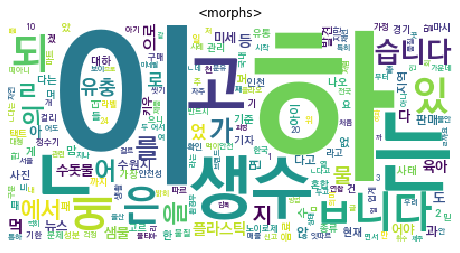

In [4]:
# 형태소
from konlpy.tag import Kkma


def count_word_freq(data):
    _data = data.lower()
    for p in punctuation:
        _data = _data.replace(p, '')
        
    kkma = Kkma()
    _data = kkma.morphs(_data)
    counter = Counter(_data)
    return counter


#--------
url = "https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=015&aid=0004386628"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
data = crawling(soup)
create_wordcloud(data)
plt.title("<morphs>");

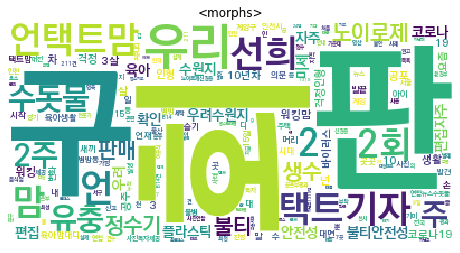

In [5]:
# 단어
from konlpy.tag import Kkma


def count_word_freq(data):
    _data = data.lower()
    for p in punctuation:
        _data = _data.replace(p, '')
        
    kkma = Kkma()
    _data = kkma.nouns(_data)
    counter = Counter(_data)
    return counter


#--------
url = "https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=015&aid=0004386628"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
data = crawling(soup)
create_wordcloud(data)
plt.title("<morphs>");

kkma tokenizer를 사용한 결과가 그다지 좋지는 않음. (colab에 mecab으로 한 것 있음)


# 3. 여러 개의 기사 내용 크롤링하기

하나의 기사만으로는 단어의 빈도수를 파악하기가 어렵다. 따라서 공통된 주제에 대한 여러 기사의 텍스트 데이터를 같이 분석하면 효과적인 워드클라우드를 출력할 수 있다.

네이버 뉴스에서 각각의 분야(정치, 경제, 사회, 생활, 세계, 과학)에 대해 페이지 최상단에 보이는 주제에 해당하는 기사들의 텍스트 데이터로 워드 클라우드를 출력해봅시다.

"정치", "경제", "사회", "생활", "세계", "과학" 중 하나를 입력하세요.
  > 사회


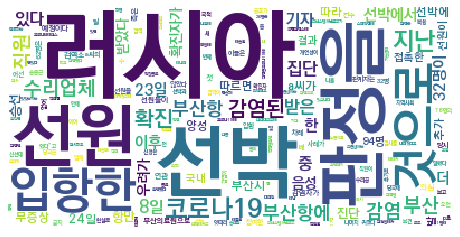

In [6]:
import requests
from bs4 import BeautifulSoup
import re

def crawling(soup) :
    div = soup.find('div', class_="_article_body_contents")
    news = div.get_text()
    news = news.replace("\n", "").replace("▶", "").replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "").replace('\t', '')
    
    return news
    
def get_href(soup):
    result = []
    
    div = soup.find('div', class_='cluster_body')
    for a in div.find_all('a'):
        result.append(a['href'])
    return result
    
    
def get_request(section):
    section_dict = {
        "정치": 100,
        "경제": 101,
        "사회": 102,
        "생활": 103,
        "세계": 104,
        "과학": 105
    }
    url = "https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=" + str(section_dict[section])
    req = requests.get(url)
    return req


def count_word_freq(data):
    _data = data.lower()
    for p in punctuation:
        _data = _data.replace(p, '')
        
    _data = _data.split()
    counter = Counter(_data)
    return counter



def create_wordcloud(data):
    counter = count_word_freq(data)
    
    wc = WordCloud(font_path="c:/windows/fonts/KoPubWorld Dotum Bold.ttf", background_color='white')
    
    plt.figure(figsize=(8, 12))
    plt.imshow(wc.generate_from_frequencies(counter))
    plt.axis('off')
    
    return None
    
    
def main():
    sec = input('"정치", "경제", "사회", "생활", "세계", "과학" 중 하나를 입력하세요.\n  > ')
    
    req = get_request(sec)
    soup = BeautifulSoup(req.text, 'html.parser')
    news_href_list = get_href(soup)
    
    result = []
    for url in news_href_list:
        req_news = requests.get(url)
        soup_news = BeautifulSoup(req_news.text, 'html.parser')
        result.append(crawling(soup_news))
    text = ' '.join(result)
    
    create_wordcloud(text)

#---------------------------------------------------------
main()


# 4. 더 많은 기사 내용 크롤링하기

더 많은 기사를 크롤링하면 풍부한 텍스트 데이터를 얻을 수 있다. 